In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [16]:
df = pd.read_csv(r'C:\Users\evan-\Documents\Python_Data\BostonHousing.csv')

In [17]:
ds = df.values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

So we have 0 nulls in the dataset, a good start that makes our job easier.

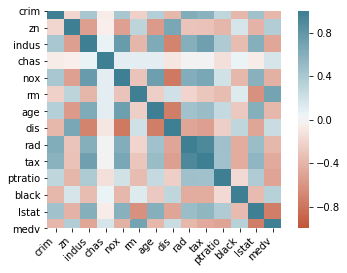

In [8]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see from the heatmap that some of our variables are all related to each in some way, but more important;y there are no extremely dark squares except for the diagonal. This lets us understand that there are no two variables extremely correlated to the point of multi-colinearity. Our dataset is a good one for data exploration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC34532D48>]],
      dtype=object)

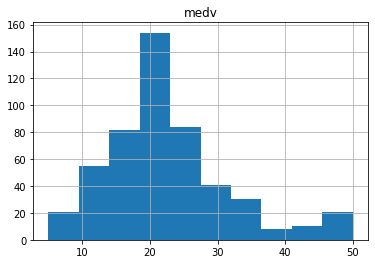

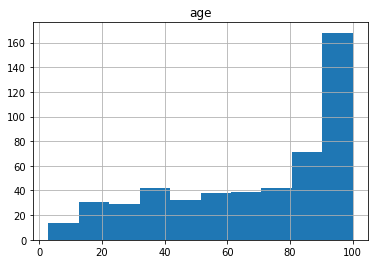

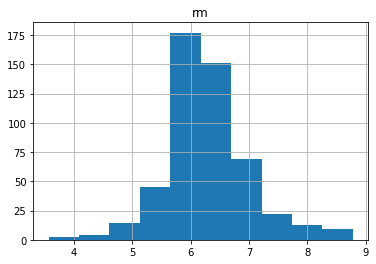

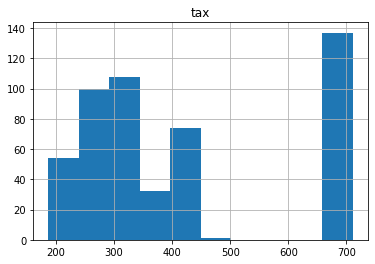

In [9]:
df.hist(column="medv", bins=10)
df.hist(column="age", bins=10)
df.hist(column="rm", bins=10)
df.hist(column="tax",bins=10)

We took histograms of a few catagories I felt interested in. and it seems the the average number of rooms and median value of homes owned follow a normal distribution, which makes sense as the number of samples is over 30 which playus into Central Limit theory. It's interesting to note that the taxes are somewhat sekewd. A lot of lower end taxation and then no upper middle taxation is odd, but then a huge spike in high taxation. This could imply that the dataset was grouped around mostly low incomne households and then an affluent section of the city. This is more apparent when you notice that the high incom bin numbers 140 cases, nearly 25% of the dataset.

In [10]:
rm=df["rm"]
tax=df["tax"]
age=df["age"]
medv=df["medv"]

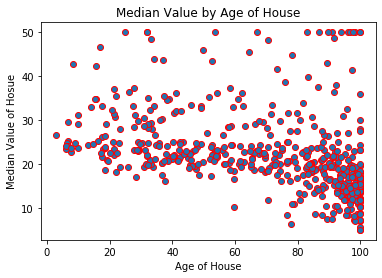

In [11]:
plt.scatter(age, medv, edgecolors='r')
plt.xlabel('Age of House')
plt.ylabel("Median Value of Hosue")
plt.title('Median Value by Age of House')
plt.show()

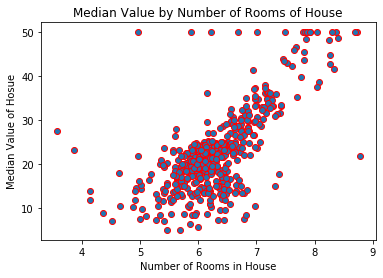

In [12]:
plt.scatter(rm, medv, edgecolors='r')
plt.xlabel('Number of Rooms in House')
plt.ylabel("Median Value of Hosue")
plt.title('Median Value by Number of Rooms of House')
plt.show()

In [ ]:
With the top scatter plot, We see a general downward trend as age increases, though there are more older houses positioned at the high end of Median Value

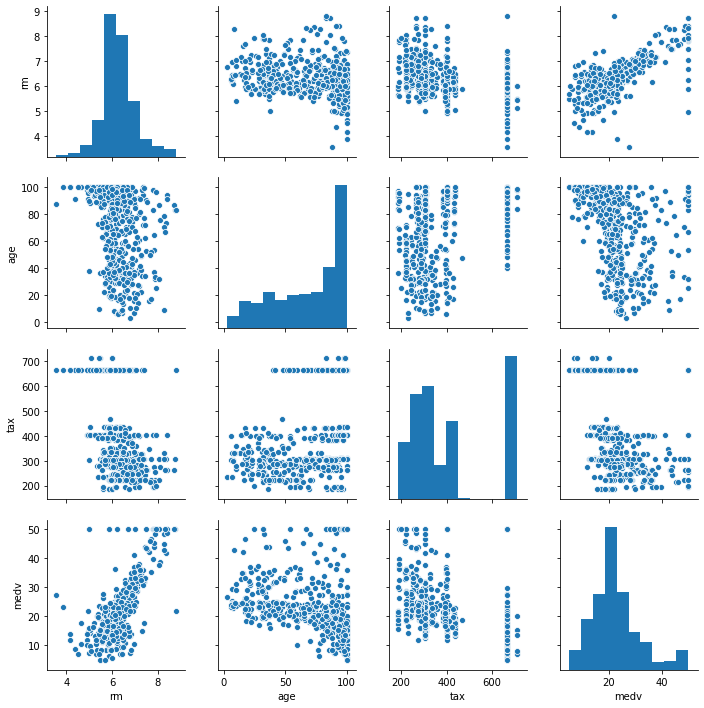

In [13]:
ds=df[["rm","age","tax","medv"]]
sns.pairplot(ds)

Pair plot with various graphs plotted against two variables to show the distributions.

Re-instance loading the dataset and converting it just values so that the neural networks can be built.

## Simple Neural Netwrok

In [18]:
#Set seed
randomSeed = 8
numpy.random.seed(randomSeed)
# split into input (X) and output (Y) variables
x = ds[:,0:13]
y = ds[:,13]
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -30.30 (22.08) MSE


## Standardizing the dataset

In [19]:
# evaluate model with standardized dataset
x1 = ds[:,0:13]
y1 = ds[:,13]
def standard_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=standard_model, epochs=150, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x1, y1, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -23.34 (26.75) MSE


## Tuning the Neural Network Topology

In [20]:
#Making a model with another Layer
x2 = ds[:,0:13]
y2 = ds[:,13]
def layered_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=layered_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x2, y2, cv=kfold)
print("Triple Layered Neural Network Topology: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Triple Layered Neural Network Topology: -23.02 (26.52) MSE


In [21]:
#Making a wider model
x3 = ds[:,0:13]
y3 = ds[:,13]
def wide_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wide_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x3, y3, cv=kfold)
print("Wide Neural Network Topology: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wide Neural Network Topology: -25.54 (24.09) MSE


In [22]:
#Making a wider and more layered model
x4 = ds[:,0:13]
y4 = ds[:,13]
def tuned_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=tuned_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x3, y3, cv=kfold)
print("Fully Tuned Neural Network Topology: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Fully Tuned Neural Network Topology: -21.78 (27.34) MSE


With our Neural Network, we look to minimize our mean squared error, MSE, and the lower the MSE the closer the fit of our models. Looking from each model we can see that greatest reduction in MSE, from 30.30 to 23.34. This shows that standardizing the data will lead to a closed model fit and therefore a more accurate prediction. Moving forward and into the tuning of the Neural Network, neither adding a layer to Neural Network nor expanding the width of the first layer seem to yield a big increase in the fit of the Neural Network, but upon adding an additional layer as well as expanding the the first layer's width, we see another marked decrease in RMSE, from 23.34 to 21.78. It is interesting to look at the standard deviation between the models, as it looks as though the model with the extra width has less varied results than any of the standardized Neural Networks, though still higher standard deviation than the non-standardized Network, but the Neural Network with both a wider first layer as well as an additional layer see its own standard deviation balloon up as the model with the highest standard deviation. I would assume that is because the additional layer, coupled with the widened first layer, creates a larger range of outputs that can be produced. It should be noted that scikit learn inverts the sign of the RMSE as it takes the maximized value, not the minimized. Due to the nature of RMSE, we can just ignore the sign, however.